# Predicting Heart Disease  using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition 
In a statement,
>Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation
>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

Create data dictionary

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
 0: Typical angina: chest pain related decrease blood supply to the heart
 1: Atypical angina: chest pain not related to heart
 2: Non-anginal pain: typically esophageal spasms (non heart related)
 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
  serum = LDL + HDL + .2 * triglycerides
  above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
 '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
 0: Nothing to note
 1: ST-T Wave abnormality
   can range from mild symptoms to severe problems
   signals non-normal heart beat
 2: Possible or definite left ventricular hypertrophy
   Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
 0: Upsloping: better heart rate with excercise (uncommon)
 1: Flatsloping: minimal change (typical healthy heart)
 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
 colored vessel means the doctor can see the blood passing through
 the more blood movement the better (no clots)
13. thal - thalium stress result
 1,3: normal
 6: fixed defect: used to be defect but ok now
 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing The Tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [9]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

### Data Exploration (EDA) 

In [6]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1        0      150      0      2.3      0   0     1       1
1   37    1   2       130   250    0        1      187      0      3.5      0   0     2       1
2   41    0   1       130   204    0        0      172      0      1.4      2   0     2       1
3   56    1   1       120   236    0        1      178      0      0.8      2   0     2       1
4   57    0   0       120   354    0        1      163      1      0.6      2   0     2       1

In [7]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
298   57    0   0       140   241    0        1      123      1      0.2      1   0     3       0
299   45    1   3       110   264    0        1      132      0      1.2      1   0     3       0
300   68    1   0       144   193    1        1      141      0      3.4      1   2     3       0
301   57    1   0       130   131    0        1      115      1      1.2      1   1     3       0
302   57    0   1       130   236    0        0      174      0      0.0      1   1     2       0

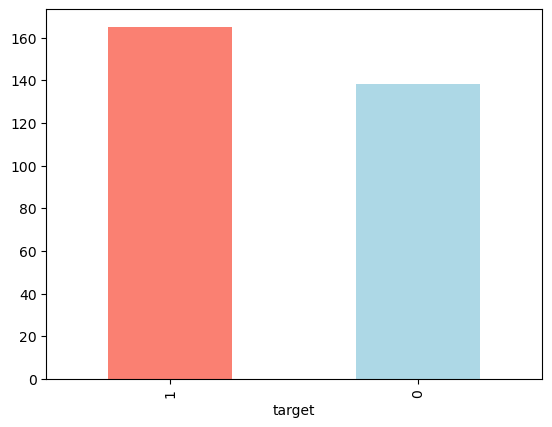

In [10]:
df['target'].value_counts().plot(kind = 'bar',color=['salmon','lightblue']);

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
df.describe()

age         sex          cp    trestbps  ...       slope          ca        thal      target
count  303.000000  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  131.623762  ...    1.399340    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052   17.538143  ...    0.616226    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000   94.000000  ...    0.000000    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  120.000000  ...    1.000000    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  130.000000  ...    1.000000    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  140.000000  ...    2.000000    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  200.000000  ...    2.000000    4.000000    3.000000    1.000000

[8 rows x 14 columns]

In [13]:
pd.crosstab(df.target,df.sex)

sex      0    1
target         
0       24  114
1       72   93

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

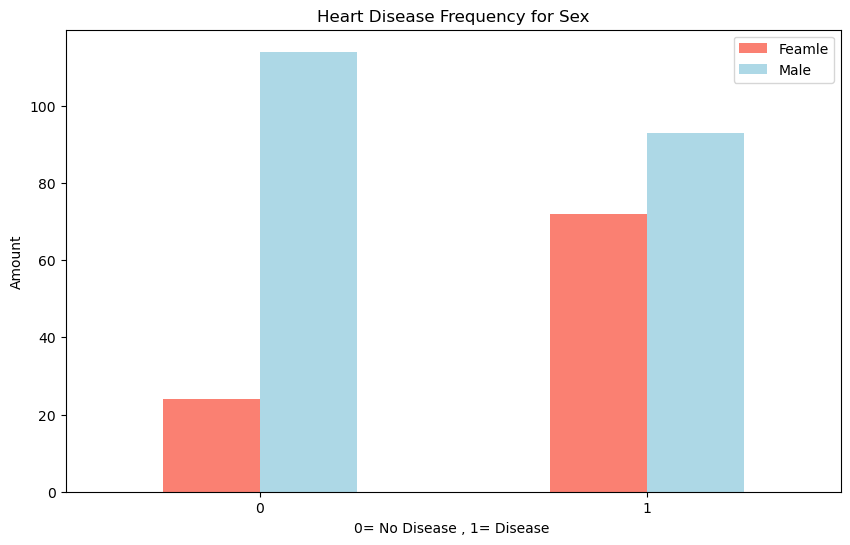

In [15]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0= No Disease , 1= Disease ')
plt.ylabel('Amount')
plt.legend(['Feamle','Male'])
plt.xticks(rotation= 0)

### Age vs. Max Heart Rate for heart disease 

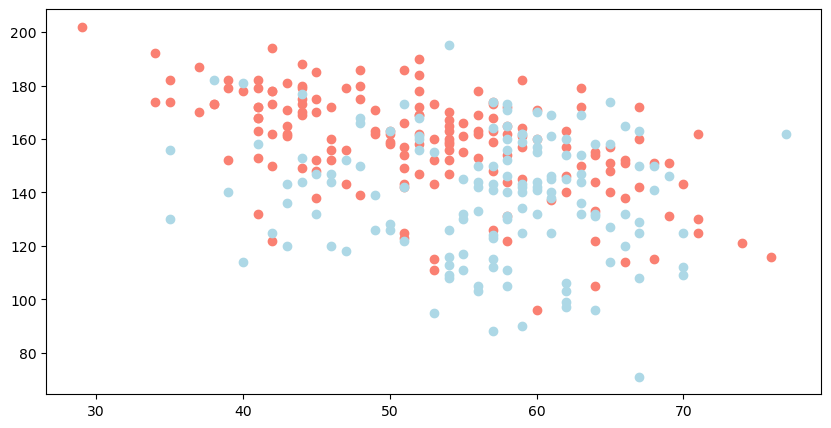

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c = 'salmon');
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c = 'lightblue');


#### Make a correlation matrix

In [20]:
df.corr()

age       sex        cp  trestbps      chol  ...   oldpeak     slope        ca      thal    target
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  ...  0.210013 -0.168814  0.276326  0.068001 -0.225439
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  ...  0.096093 -0.030711  0.118261  0.210041 -0.280937
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  ... -0.149230  0.119717 -0.181053 -0.161736  0.433798
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  ...  0.193216 -0.121475  0.101389  0.062210 -0.144931
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  ...  0.053952 -0.004038  0.070511  0.098803 -0.085239
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  ...  0.005747 -0.059894  0.137979 -0.032019 -0.028046
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040  ... -0.058770  0.093045 -0.072042 -0.011981  0.137230
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940  ... -0.344187  0.386784 -0.213177 -0.096439  0.421741
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  ...  0.288223 -0.257748  0.115739  0.206754 -0.436757
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  ...  1.000000 -0.577537  0.222682  0.210244 -0.430696
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038  ... -0.577537  1.000000 -0.080155 -0.104764  0.345877
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  ...  0.222682 -0.080155  1.000000  0.151832 -0.391724
thal      0.068001  0.210041 -0.161736  0.062210  0.098803  ...  0.210244 -0.104764  0.151832  1.000000 -0.344029
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239  ... -0.430696  0.345877 -0.391724 -0.344029  1.000000

[14 rows x 14 columns]

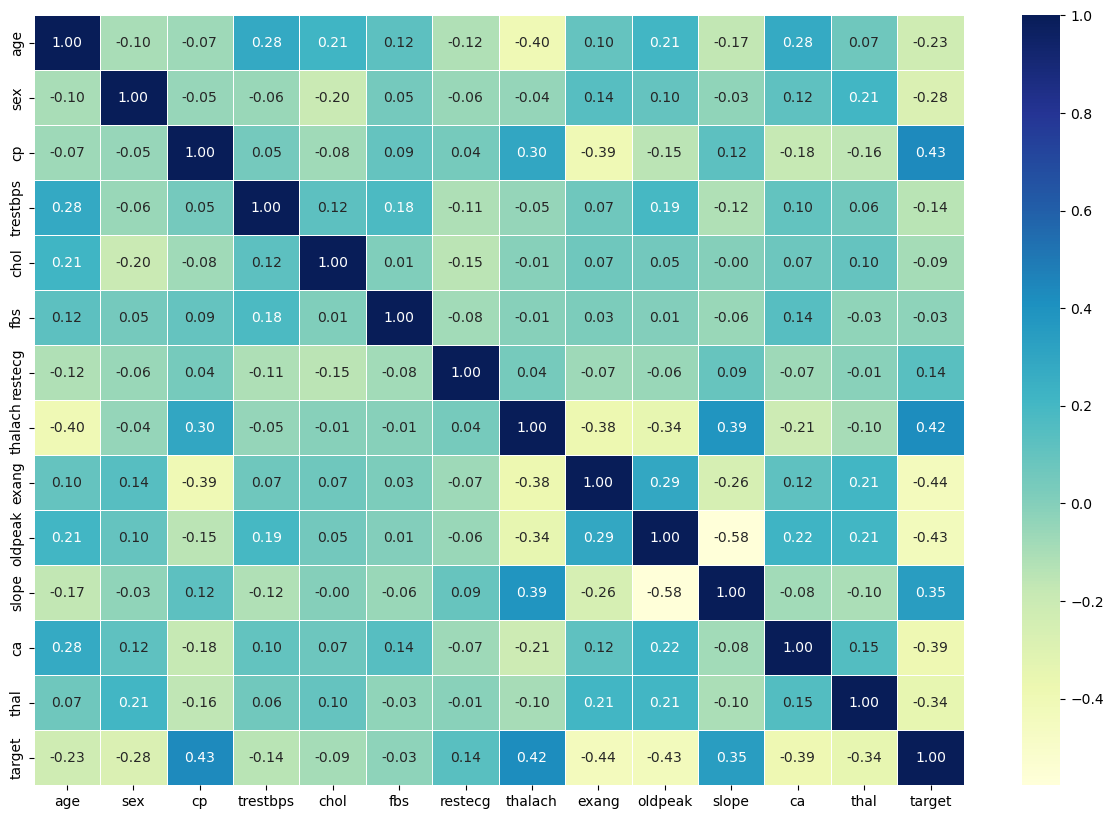

In [22]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap= 'YlGnBu')

## 5. Modelling 



In [25]:
x= df.drop('target',axis=1)
y= df['target']

In [26]:
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [27]:
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores


In [28]:
model_score = fit_and_score(models,x_train,x_test,y_train,y_test)
model_score

C:\Users\gargi\Documents\ml_projects\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

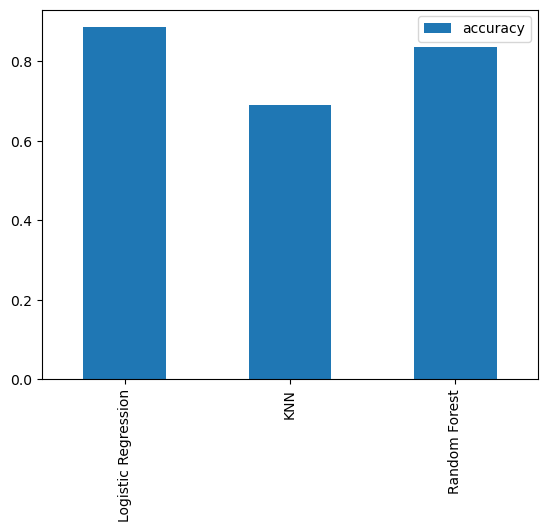

In [29]:
models_compare = pd.DataFrame(model_score,index=['accuracy'])
models_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning (by hand)

In [31]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


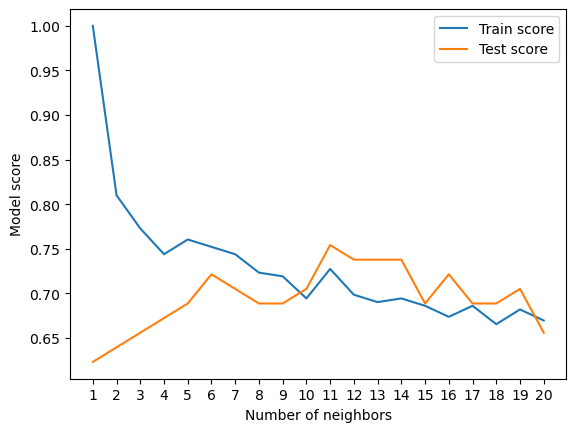

In [34]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV
We're going to tune:

* LogisticRegression()
* RandomForestClassifier()
... using RandomizedSearchCV

In [39]:
log_reg_grid ={ 'C': np.logspace(-4,4,20),
              'solver': ['liblinear']}

rf_grid = {'n_estimators': np.arange(10,100,50),
          'max_depth':[None,3,5,10],
          'min_samples_split': np.arange(2,20,2),
          'min_samples_leaf': np.arange(1,20,2)}

In [36]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [38]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [40]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [41]:
rs_rf.best_params_

{'n_estimators': np.int64(10),
 'min_samples_split': np.int64(18),
 'min_samples_leaf': np.int64(17),
 'max_depth': 3}

In [42]:
rs_rf.score(x_test,y_test)

0.819672131147541

## Hyperparamter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [43]:
log_reg_grid ={ 'C': np.logspace(-4,4,30),
              'solver': ['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [44]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [45]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluting our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [47]:
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

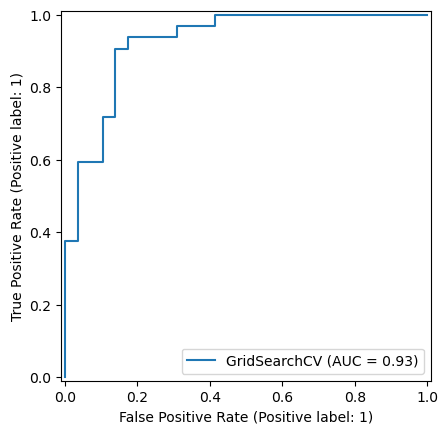

In [49]:
RocCurveDisplay.from_estimator(gs_log_reg,x_test,y_test);

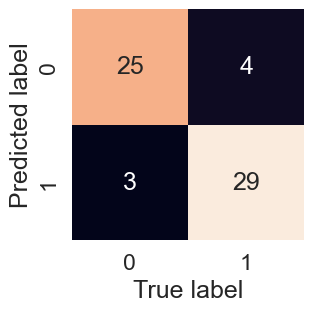

In [50]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

In [51]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score()

In [52]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [53]:
clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')

In [56]:
# Cross-validated accuracy
cv_acc = np.mean(cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy"))
cv_acc

np.float64(0.8446994535519124)

In [58]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [60]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [61]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

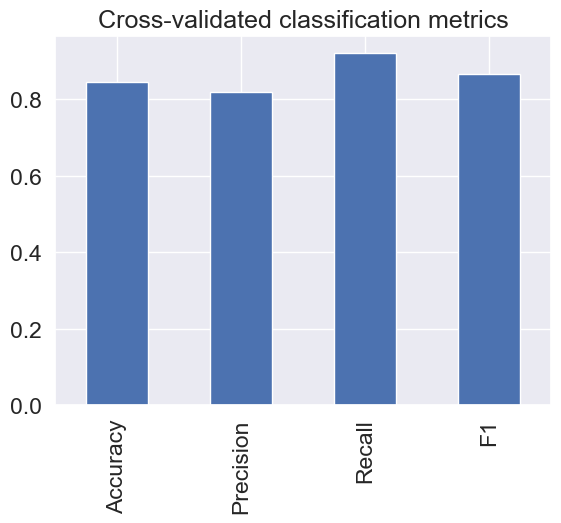

In [62]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

# Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"


In [63]:
clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')

In [65]:
clf.fit(x_train, y_train);

In [66]:
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [67]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672721856887734),
 'sex': np.float64(-0.860445816920919),
 'cp': np.float64(0.6606707303492849),
 'trestbps': np.float64(-0.011569930902919925),
 'chol': np.float64(-0.001663741604035976),
 'fbs': np.float64(0.04386130751482091),
 'restecg': np.float64(0.3127578715206996),
 'thalach': np.float64(0.02459360818122666),
 'exang': np.float64(-0.6041303799858143),
 'oldpeak': np.float64(-0.5686285194546157),
 'slope': np.float64(0.4505161679452401),
 'ca': np.float64(-0.6360986316921434),
 'thal': np.float64(-0.6766337521354281)}

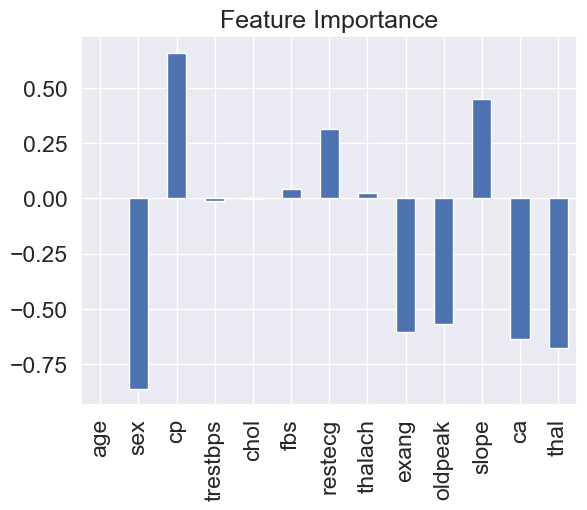

In [68]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);